In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
# nltk.download('all')

In [2]:
plt.style.use('ggplot')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
DataFrame = pd.read_csv("ImranKhanPTI.csv")


In [4]:
DataFrame

,Date,User,Tweets
0,2022-10-30 14:07:08+00:00,ImranKhanPTI,Shocked &amp; deeply saddened by the terrible ...
1,2022-10-29 17:37:22+00:00,ImranKhanPTI,For all those spreading rumours about my mtg i...
2,2022-10-28 18:43:41+00:00,ImranKhanPTI,Congratulations to Abid Zuberi on his election...
3,2022-10-24 11:28:55+00:00,ImranKhanPTI,We saw a foreign abetted regime change conspir...
4,2022-10-24 11:28:54+00:00,ImranKhanPTI,&amp; safeguarded against excesses by the Stat...
...,...,...,...
995,2018-04-20 08:29:01+00:00,ImranKhanPTI,I welcome the remarks of CJP on the shortcomin...
996,2018-04-20 08:21:53+00:00,ImranKhanPTI,Appreciate CJP's praise for KP IGP &amp; CS. W...
997,2018-04-19 15:36:41+00:00,ImranKhanPTI,Deplorable how Sindh police is instituting fal...
998,2018-04-15 15:33:03+00:00,ImranKhanPTI,The shameful firing on Justice Ijaz ul Ahsan's...


In [5]:
DataFrame.shape

(1000, 3)

In [6]:
DataFrame.isnull().sum()

Date      0
User      0
Tweets    0
dtype: int64

In [7]:
DataFrame.columns

Index(['Date', 'User', 'Tweets'], dtype='object')

In [9]:
DataFrame.describe().T

,count,unique,top,freq
Date,1000,926,2022-01-17 09:07:06+00:00,2
User,1000,1,ImranKhanPTI,1000
Tweets,1000,995,Wishing all our Christian citizens a happy Eas...,3


In [10]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1000 non-null   object
 1   User    1000 non-null   object
 2   Tweets  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [11]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1000 non-null   object
 1   User    1000 non-null   object
 2   Tweets  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [12]:
example = DataFrame['Tweets'].values[0]
example

'Shocked &amp; deeply saddened by the terrible accident that led to the death of Channel 5 reporter Sadaf Naeem during our March today. I have no words to express my sorrow. My prayers &amp; condolences go to the family at this tragic time. We have cancelled our March for today.'

In [13]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Shocked',
 '&',
 'amp',
 ';',
 'deeply',
 'saddened',
 'by',
 'the',
 'terrible',
 'accident']

In [14]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Shocked', 'NNP'),
 ('&', 'CC'),
 ('amp', 'NN'),
 (';', ':'),
 ('deeply', 'RB'),
 ('saddened', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('terrible', 'JJ'),
 ('accident', 'NN')]

In [16]:
nltk.download('maxent_ne_chunker')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [18]:
nltk.download('words')


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [19]:
# The primary usage of chunking is to make a group of "noun phrases." The parts of speech are combin.
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint # pretty print

<bound method Tree.pprint of Tree('S', [('Shocked', 'NNP'), ('&', 'CC'), ('amp', 'NN'), (';', ':'), ('deeply', 'RB'), ('saddened', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('terrible', 'JJ'), ('accident', 'NN'), ('that', 'WDT'), ('led', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('death', 'NN'), ('of', 'IN'), Tree('ORGANIZATION', [('Channel', 'NNP')]), ('5', 'CD'), ('reporter', 'NN'), Tree('PERSON', [('Sadaf', 'NNP'), ('Naeem', 'NNP')]), ('during', 'IN'), ('our', 'PRP$'), ('March', 'NNP'), ('today', 'NN'), ('.', '.'), ('I', 'PRP'), ('have', 'VBP'), ('no', 'DT'), ('words', 'NNS'), ('to', 'TO'), ('express', 'VB'), ('my', 'PRP$'), ('sorrow', 'NN'), ('.', '.'), ('My', 'NNP'), ('prayers', 'NNS'), ('&', 'CC'), ('amp', 'NN'), (';', ':'), ('condolences', 'NNS'), ('go', 'VBP'), ('to', 'TO'), ('the', 'DT'), ('family', 'NN'), ('at', 'IN'), ('this', 'DT'), ('tragic', 'JJ'), ('time', 'NN'), ('.', '.'), ('We', 'PRP'), ('have', 'VBP'), ('cancelled', 'VBN'), ('our', 'PRP$'), ('March', 'NNP'), ('for', 'IN'), ('t

In [20]:
# Lets drop the unnecessary columns
df = DataFrame.drop(['Date', 'User'], axis = 'columns')
df.head()

,Tweets
0,Shocked &amp; deeply saddened by the terrible ...
1,For all those spreading rumours about my mtg i...
2,Congratulations to Abid Zuberi on his election...
3,We saw a foreign abetted regime change conspir...
4,&amp; safeguarded against excesses by the Stat...


In [21]:
df.insert(loc = 0, column ='id', value = df.index+1)
df.head()

,id,Tweets
0,1,Shocked &amp; deeply saddened by the terrible ...
1,2,For all those spreading rumours about my mtg i...
2,3,Congratulations to Abid Zuberi on his election...
3,4,We saw a foreign abetted regime change conspir...
4,5,&amp; safeguarded against excesses by the Stat...


In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 
# tqdm is a library in Python which is used for creating Progress Meters or Progress Bars. tqdm got its name from the Arabic name taqaddum which means 'progress'.

sia = SentimentIntensityAnalyzer()

In [23]:
sia


In [24]:
sia.polarity_scores(example)


{'neg': 0.411, 'neu': 0.589, 'pos': 0.0, 'compound': -0.9781}

In [25]:
# Run the polarity score on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Tweets']
    myid = row['id']
    result[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [26]:
result

{1: {'neg': 0.411, 'neu': 0.589, 'pos': 0.0, 'compound': -0.9781},
 2: {'neg': 0.05, 'neu': 0.856, 'pos': 0.094, 'compound': 0.5574},
 3: {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.5994},
 4: {'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'compound': -0.8519},
 5: {'neg': 0.201, 'neu': 0.719, 'pos': 0.08, 'compound': -0.7717},
 6: {'neg': 0.149, 'neu': 0.744, 'pos': 0.108, 'compound': -0.4767},
 7: {'neg': 0.448, 'neu': 0.552, 'pos': 0.0, 'compound': -0.7579},
 8: {'neg': 0.172, 'neu': 0.771, 'pos': 0.057, 'compound': -0.6908},
 9: {'neg': 0.321, 'neu': 0.56, 'pos': 0.119, 'compound': -0.9194},
 10: {'neg': 0.164, 'neu': 0.794, 'pos': 0.042, 'compound': -0.802},
 11: {'neg': 0.242, 'neu': 0.689, 'pos': 0.069, 'compound': -0.9006},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.202, 'neu': 0.623, 'pos': 0.175, 'compound': -0.34},
 14: {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.9089},
 15: {'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound':

In [27]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns = {'index':'id'})
vaders = vaders.merge(df)

In [28]:
vaders

,id,neg,neu,pos,compound,Tweets
0,1,0.411,0.589,0.000,-0.9781,Shocked &amp; deeply saddened by the terrible ...
1,2,0.050,0.856,0.094,0.5574,For all those spreading rumours about my mtg i...
2,3,0.000,0.698,0.302,0.5994,Congratulations to Abid Zuberi on his election...
3,4,0.181,0.819,0.000,-0.8519,We saw a foreign abetted regime change conspir...
4,5,0.201,0.719,0.080,-0.7717,&amp; safeguarded against excesses by the Stat...
...,...,...,...,...,...,...
995,996,0.000,0.919,0.081,0.4497,I welcome the remarks of CJP on the shortcomin...
996,997,0.000,0.665,0.335,0.9524,Appreciate CJP's praise for KP IGP &amp; CS. W...
997,998,0.248,0.752,0.000,-0.8720,Deplorable how Sindh police is instituting fal...
998,999,0.221,0.669,0.110,-0.6808,The shameful firing on Justice Ijaz ul Ahsan's...


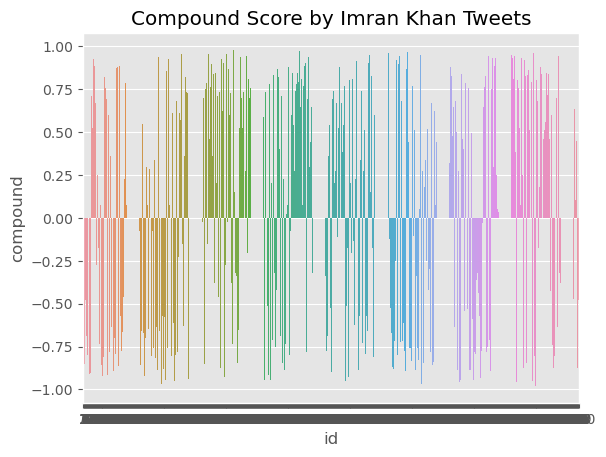

In [29]:
ax = sns.barplot(data=vaders, x='id', y='compound')
ax.set_title('Compound Score by Imran Khan Tweets')
plt.show()

In [30]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [31]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [33]:
# VADER result on example
print(example)
sia.polarity_scores(example)

Shocked &amp; deeply saddened by the terrible accident that led to the death of Channel 5 reporter Sadaf Naeem during our March today. I have no words to express my sorrow. My prayers &amp; condolences go to the family at this tragic time. We have cancelled our March for today.


{'neg': 0.411, 'neu': 0.589, 'pos': 0.0, 'compound': -0.9781}

In [34]:
# Run for Roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.891517, 'roberta_neu': 0.09679281, 'roberta_pos': 0.011690195}


In [35]:
# Run the Roberta model as function
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict


In [36]:
# Run the polarity score on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Tweets']
    myid = row['id']
    vader_result = sia.polarity_scores(text)
    
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f'vader_{key}'] = value
        
    roberta_result = polarity_scores_roberta(text)
    
    both = {**vader_result_rename, **roberta_result}
    result[myid] = both


  0%|          | 0/1000 [00:00<?, ?it/s]

In [37]:
results_df = pd.DataFrame(result).T
results_df = results_df.reset_index().rename(columns = {'index' : 'id'})
results_df = results_df.merge(df)

In [38]:
results_df.head()


,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Tweets
0,1,0.411,0.589,0.000,-0.9781,0.891517,0.096793,0.011690,Shocked &amp; deeply saddened by the terrible ...
1,2,0.050,0.856,0.094,0.5574,0.135448,0.739988,0.124564,For all those spreading rumours about my mtg i...
2,3,0.000,0.698,0.302,0.5994,0.000912,0.026278,0.972810,Congratulations to Abid Zuberi on his election...
3,4,0.181,0.819,0.000,-0.8519,0.706278,0.284221,0.009501,We saw a foreign abetted regime change conspir...
4,5,0.201,0.719,0.080,-0.7717,0.849358,0.145258,0.005384,&amp; safeguarded against excesses by the Stat...


In [39]:
results_df.columns


Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Tweets'],
      dtype='object')

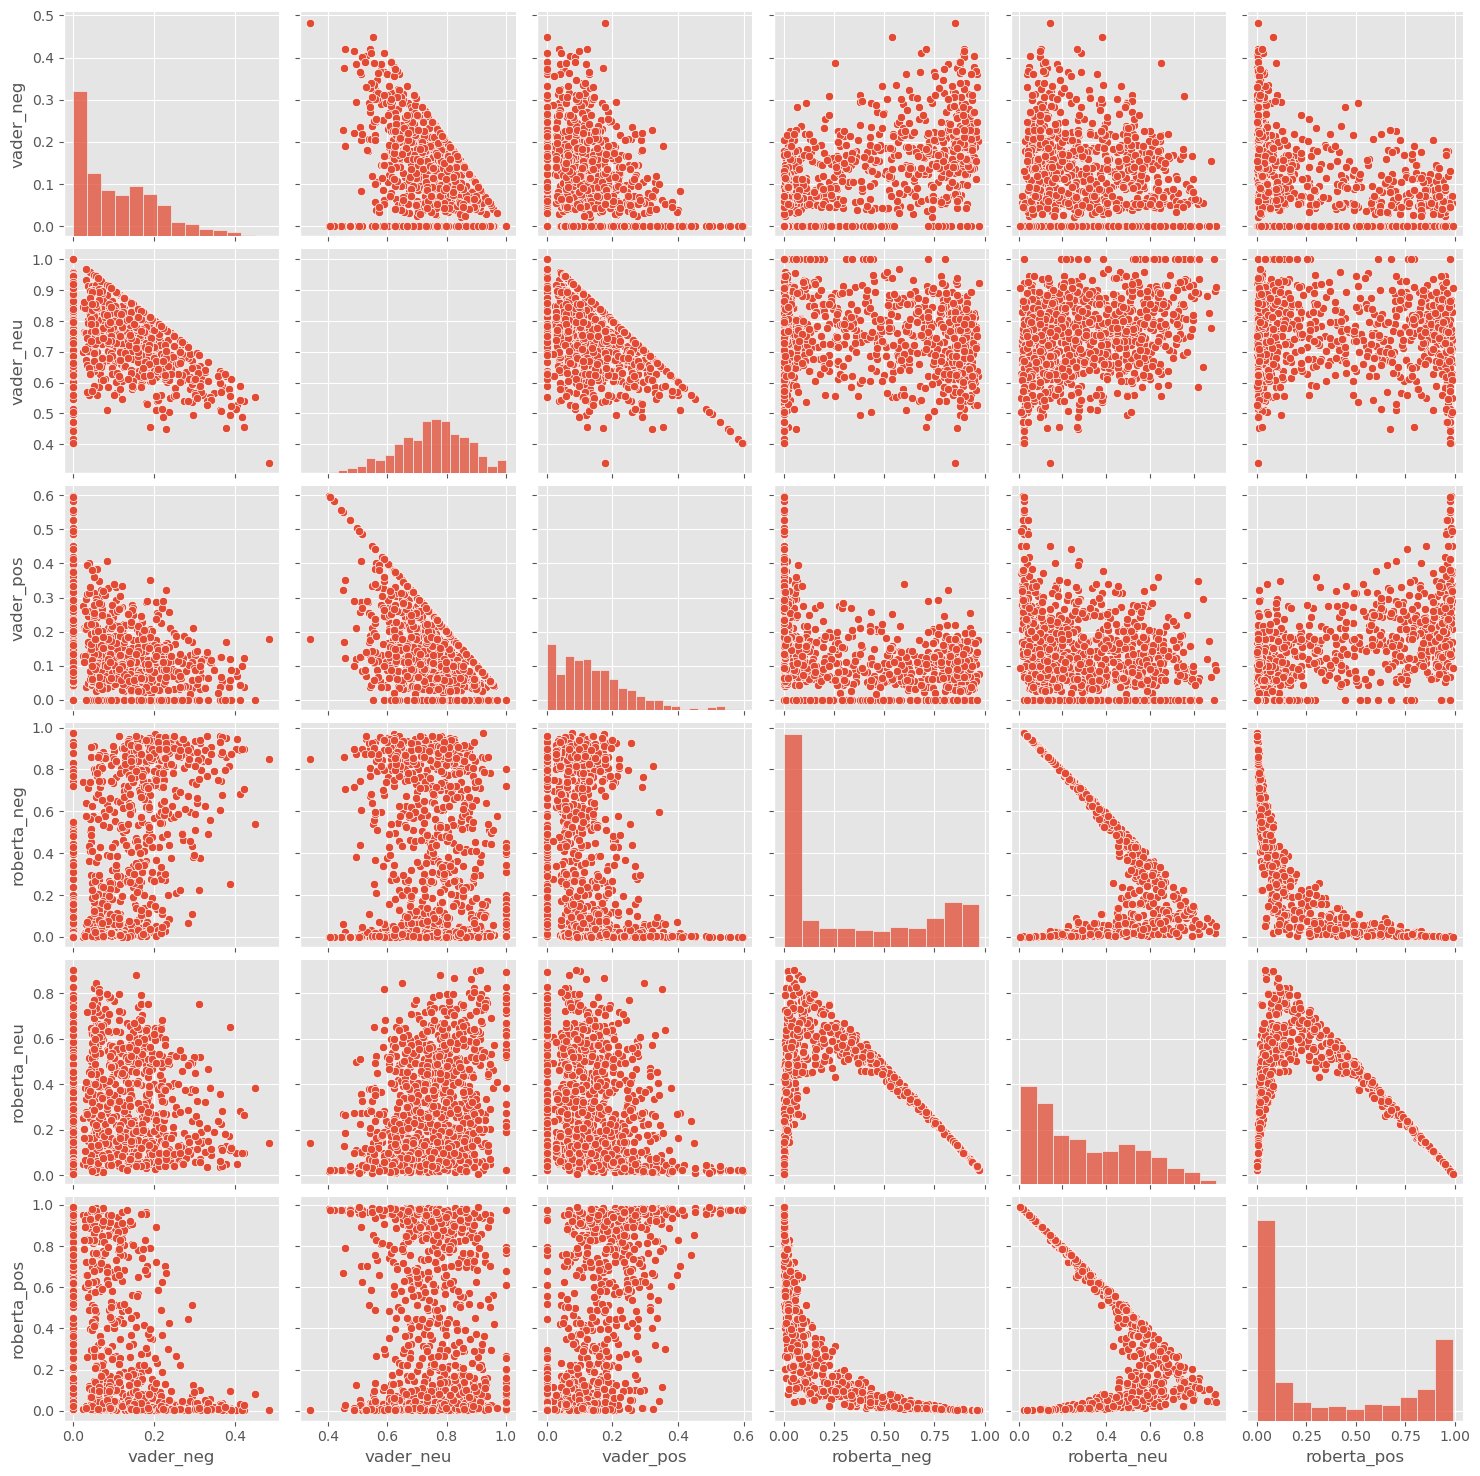

In [40]:
sns.pairplot(data = results_df , 
             vars = ['vader_neg', 'vader_neu', 'vader_pos',
             'roberta_neg', 'roberta_neu', 'roberta_pos'])
plt.show()

In [41]:
from transformers import pipeline


In [42]:
sentiment_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [43]:
sentiment_pipeline('I love sentiment analysis!')


[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [44]:
sentiment_pipeline('Make sure to comment and Upvoted!')


[{'label': 'POSITIVE', 'score': 0.9988288283348083}]

In [45]:
sentiment_pipeline('I am not in the mood to watch a movie now.')


[{'label': 'NEGATIVE', 'score': 0.9994232654571533}]